<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Logo_udinus1.jpg/225px-Logo_udinus1.jpg' weight='200'></center>

<hr>

#EDA


In [14]:
# Load Library

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
import sys

In [15]:
# Menampilkan Semua Kolom
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [16]:
# Load data
data = pd.read_csv('segmentation data.csv')

In [17]:
# Menampilkan beberapa baris pertama dari dataset
print("Jumlah data:", len(data))
print(data.head())

Jumlah data: 2000
          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  


In [18]:
# Menampilkan nama-nama kolom untuk memastikan semuanya benar
print("Nama Kolom:", data.columns)

Nama Kolom: Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')


In [19]:
# Informasi tentang dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None


In [20]:
# Deskripsi statistik dari dataset
print(data.describe())

                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000        

In [21]:
# Menghapus nilai yang hilang
data = data.dropna()
print("Jumlah data setelah menghapus nilai hilang:", len(data))

Jumlah data setelah menghapus nilai hilang: 2000


In [22]:
# Feature Engineering (Rekayasa Fitur)
# Mengubah variabel kategorikal menjadi numerik menggunakan Label Encoding
label_encoders = {}
categorical_columns = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [23]:
# Menghapus kolom 'ID' karena tidak diperlukan untuk clustering
data.drop(columns=['ID'], inplace=True)

In [24]:
# Normalisasi data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

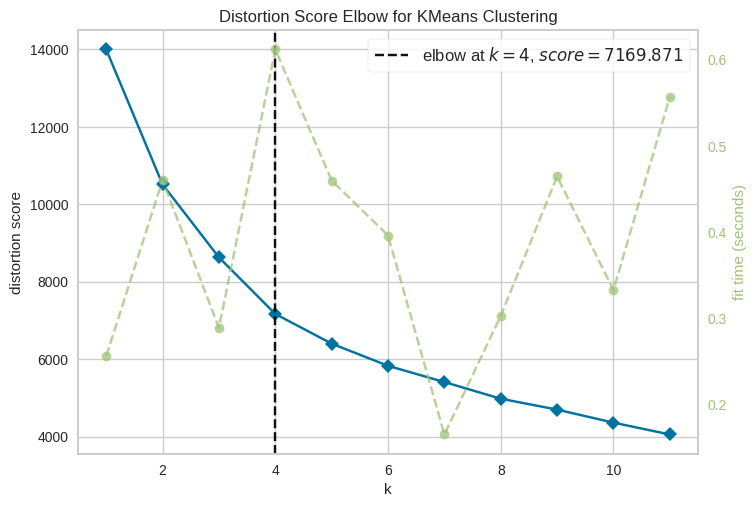

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Menentukan jumlah cluster yang optimal menggunakan metode elbow
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(data_normalized)
visualizer.show()

In [26]:
# Menerapkan K-Means Clustering
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
# Menampilkan penugasan cluster untuk setiap data
print(data[['Cluster']])

      Cluster
0           0
1           2
2           1
3           3
4           3
5           1
6           3
7           3
8           0
9           3
10          2
11          2
12          2
13          1
14          2
15          2
16          1
17          3
18          0
19          3
20          3
21          3
22          1
23          3
24          3
25          1
26          1
27          0
28          3
29          0
30          3
31          3
32          3
33          1
34          2
35          1
36          3
37          3
38          3
39          3
40          3
41          2
42          1
43          3
44          0
45          2
46          1
47          2
48          1
49          2
50          1
51          3
52          3
53          1
54          0
55          1
56          3
57          2
58          2
59          2
60          3
61          3
62          0
63          3
64          2
65          3
66          2
67          2
68          3
69          2
70    

In [28]:
# Mempersonalisasi cluster dengan merangkum statistik utama untuk setiap cluster
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

              Sex  Marital status        Age  Education         Income  \
Cluster                                                                  
0        0.501901        0.692015  55.703422   2.129278  158338.422053   
1        0.352814        0.019481  35.577922   0.746753   97859.852814   
2        0.853901        0.997163  28.963121   1.068085  105759.119149   
3        0.029825        0.173684  35.635088   0.733333  141218.249123   

         Occupation  Settlement size  
Cluster                               
0          1.129278         1.110266  
1          0.329004         0.043290  
2          0.634043         0.422695  
3          1.271930         1.522807  


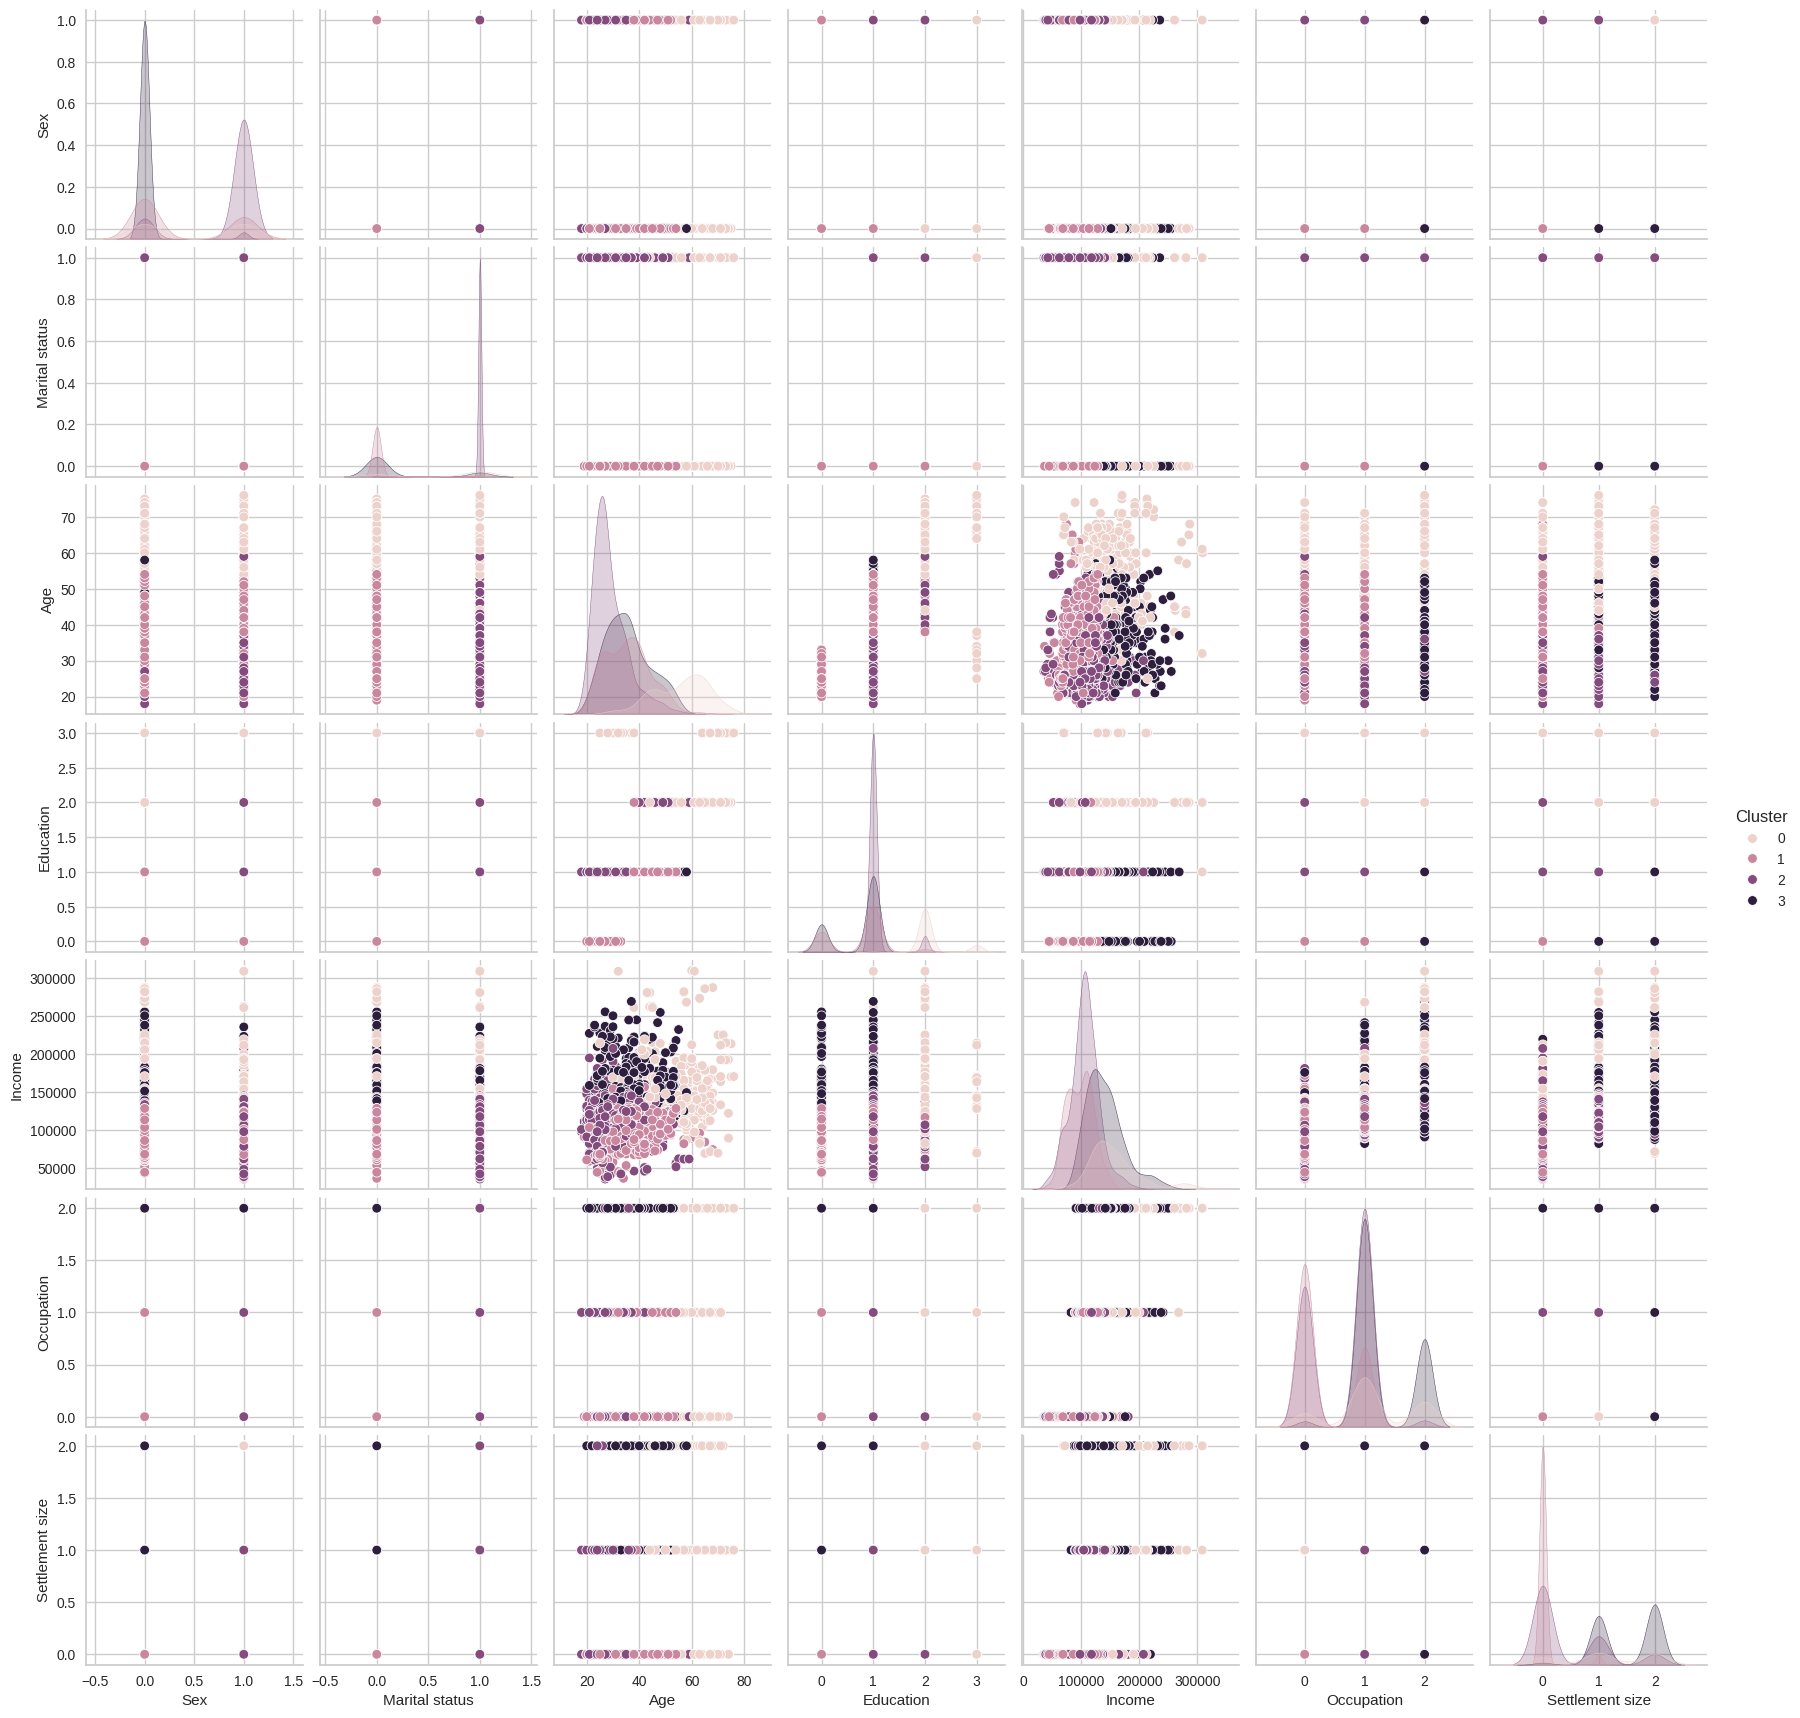

In [29]:
# Memvisualisasikan cluster menggunakan pairplot
sns.pairplot(data, hue='Cluster')
plt.show()

In [31]:
# Menampilkan customer dengan kolom paling akhir yaitu clusternya
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3


from matplotlib import pyplot as plt
_df_0['Sex'].plot(kind='hist', bins=20, title='Sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Marital status'].plot(kind='hist', bins=20, title='Marital status')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Education'].plot(kind='hist', bins=20, title='Education')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Sex', y='Marital status', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Marital status', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Age', y='Education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Education', y='Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Sex'].plot(kind='line', figsize=(8, 4), title='Sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Marital status'].plot(kind='line', figsize=(8, 4), title='Marital status')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Education'].plot(kind='line', figsize=(8, 4), title='Education')
plt.gca().spines[['top', 'right']].set_visible(False)

#K-optimal
K optimal yang didapatkan adalah 𝐾 = 4

# Personalisasi Cluster yang ditemukan

Cluster 0 :
Mayoritas jenis kelamin adalah wanita (Sex ~0.5).
Sebagian besar sudah menikah (Marital status ~0.69).
Usia rata-rata adalah sekitar 55 tahun.
Tingkat pendidikan cukup tinggi (Education ~2.13).
Pendapatan rata-rata tinggi (Income ~158,338).
Pekerjaan dominan di level tinggi (Occupation ~1.13).
Tinggal di daerah urban besar (Settlement size ~1.11).

Cluster 1 :
Mayoritas jenis kelamin adalah pria (Sex ~0.35).
Sebagian besar belum menikah (Marital status ~0.02).
Usia rata-rata adalah sekitar 35 tahun.
Tingkat pendidikan rendah (Education ~0.75).
Pendapatan rata-rata menengah (Income ~97,859).
Pekerjaan dominan di level menengah (Occupation ~0.33).
Tinggal di daerah urban kecil (Settlement size ~0.04).

Cluster 2 :
Mayoritas jenis kelamin adalah wanita (Sex ~0.85).
Sebagian besar sudah menikah (Marital status ~0.99).
Usia rata-rata adalah sekitar 28 tahun.
Tingkat pendidikan menengah (Education ~1.07).
Pendapatan rata-rata menengah (Income ~105,759).
Pekerjaan dominan di level menengah (Occupation ~0.63).
Tinggal di daerah urban sedang (Settlement size ~0.42).

Cluster 3 :
Mayoritas jenis kelamin adalah pria (Sex ~0.03).
Sebagian besar belum menikah (Marital status ~0.17).
Usia rata-rata adalah sekitar 35 tahun.
Tingkat pendidikan rendah (Education ~0.73).
Pendapatan rata-rata tinggi (Income ~141,218).
Pekerjaan dominan di level tinggi (Occupation ~1.27).
Tinggal di daerah urban besar (Settlement size ~1.52).

In [30]:
# Menyimpan dataset yang telah dimodifikasi dengan penugasan cluster
data.to_csv('segmentation_data_with_clusters.csv', index=False)